## XAMS SiPM simulation## 

In [1]:
#
# import the SiPM classes
#
from SiPM import *
# for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Define general geometry parameters ###

In [2]:
# z position of the in-plane SiPMs
z_plane = 10
# radius of the cyinder for SiPMs at the side
r_cylinder = 22
# radius of a SiPM - I assume circular SiPMs with a radius to make the area correspond to a 3x3mm2 square.
r_sipm = 1.6925
# build geometry
geo = GeoParameters(z_plane=z_plane, r_cylinder=r_cylinder, r_sipm=r_sipm)

### Define the geometry of the silicon PMs ###

In [3]:
# generate a XAMS geometry with SiPMs in plane above the LXe
for x in np.linspace(-15,15,3,endpoint=True):
    for y in np.linspace(-15,15,3,endpoint=True):
        sipm = SiPM(type="plane",position=[x,y,z_plane],qeff=0.25)
        geo.add_sipm(sipm)

### Simulate the SiPM acceptance ###

* uv_position is the position where the UV photons are generated
* n_mc is the number of MC photons

In [13]:
sim = Simulator(geo=geo,uv_position=[7,-4,0],n_mc=1000000)
sim.generate_events()

generated  0  events
generated  100000  events
generated  200000  events
generated  300000  events
generated  400000  events
generated  500000  events
generated  600000  events
generated  700000  events
generated  800000  events
generated  900000  events
Number of SiPMs =  9  Generated hits from x= [7, -4, 0]
 0  (x,y,z) = (-15.0, -15.0, 10.0) p(hit) = 0.00011  qe = 0.250
 1  (x,y,z) = (-15.0,  0.0, 10.0) p(hit) = 0.00011  qe = 0.250
 2  (x,y,z) = (-15.0, 15.0, 10.0) p(hit) = 0.00006  qe = 0.250
 3  (x,y,z) = ( 0.0, -15.0, 10.0) p(hit) = 0.00042  qe = 0.250
 4  (x,y,z) = ( 0.0,  0.0, 10.0) p(hit) = 0.00086  qe = 0.250
 5  (x,y,z) = ( 0.0, 15.0, 10.0) p(hit) = 0.00016  qe = 0.250
 6  (x,y,z) = (15.0, -15.0, 10.0) p(hit) = 0.00036  qe = 0.250
 7  (x,y,z) = (15.0,  0.0, 10.0) p(hit) = 0.00072  qe = 0.250
 8  (x,y,z) = (15.0, 15.0, 10.0) p(hit) = 0.00014  qe = 0.250
event generation done


### Emulate events and reconstruct the position ###

* n_event = number of events to emulate
* n_uv = number of UV photons assumed for the S2 signal

In [36]:
rec = Reconstruction(geo=geo,sim=sim)
df = rec.emulate_events(n_uv=15000,n_event=1000,method="LNLIKE",plot=False,nbins=100,range=((-30,30),(-30,30)))

generated  0  events
generated  100  events
generated  200  events
generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
<SiPM.SiPM object at 0x1134d1e48>  n =  1
<SiPM.SiPM object at 0x1134d1e80>  n =  0
<SiPM.SiPM object at 0x1134d1eb8>  n =  1
<SiPM.SiPM object at 0x1134d1ef0>  n =  3
<SiPM.SiPM object at 0x1134d1f28>  n =  17
<SiPM.SiPM object at 0x1134d1f60>  n =  4
<SiPM.SiPM object at 0x1134d1f98>  n =  3
<SiPM.SiPM object at 0x1134d1fd0>  n =  8
<SiPM.SiPM object at 0x1134e5048>  n =  1
m_status = False
generated  800  events
generated  900  events
<SiPM.SiPM object at 0x1134d1e48>  n =  0
<SiPM.SiPM object at 0x1134d1e80>  n =  3
<SiPM.SiPM object at 0x1134d1eb8>  n =  0
<SiPM.SiPM object at 0x1134d1ef0>  n =  8
<SiPM.SiPM object at 0x1134d1f28>  n =  13
<SiPM.SiPM object at 0x1134d1f60>  n =  2
<SiPM.SiPM object at 0x1134d1f98>  n =  6
<SiPM.SiPM object at 0x1134d1fd0>  n =  11
<SiPM.SiPM object at 0x1134e5048>  n =

### Plots from here ...... ###

<xr> =  7.8279713015082235  +/- 0.279751996503588  mm
    rms_x =  8.837683926722432  mm
<yr> =  -4.375296659331099  +/- 0.15854271106858528  mm
    rms_y =  5.00854466392294  mm


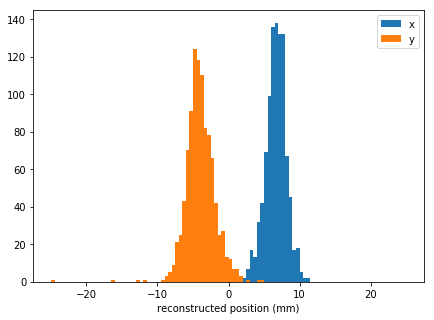

In [37]:
a = rec.plot(type="res",bins=100,range=(-25,25))
#a.set_ylim((0.1,1e3))


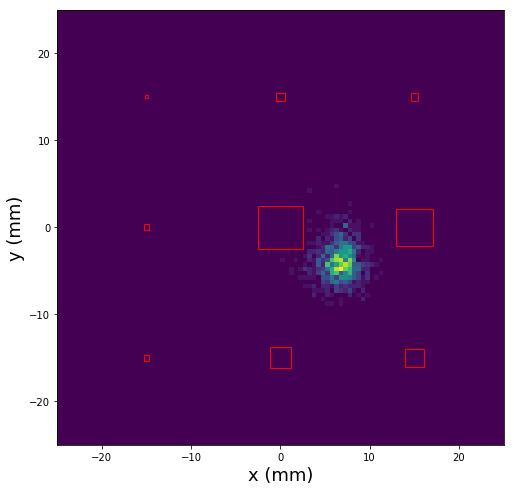

In [38]:
ax = rec.plot(type="xy",range=((-25,25),(-25,25)),fcut=500000)

 N(UV) reco =  44277.46584974653  +/- 10927.312757223703


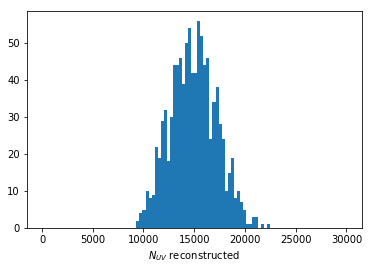

In [41]:
rec.plot(type="intensity",range=(0,30000))

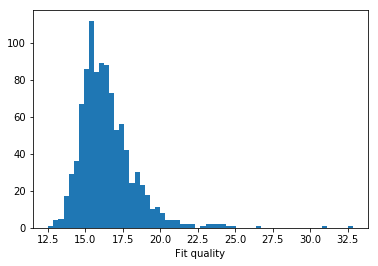

In [42]:
rec.plot(type="fval",bins=60)